## 2022 Najee Harris Fantasy Outlook

Siddarth Puliyanda

For the 2022 NFL season one of the top Fantasy Football picks is Najee Harris, who as a rookie last year finished 4th overall for running backs in 0.5 PPR scoring. Although he dominated last year he has several question marks going into this season (playing with a different quarterback, negative receiving regression, and low 2021 efficiency). This has led him to be ranked as the 7-10th running back off the draft board, which I think is too low.

In this notebook, we will analyze Usage vs. Efficiency for running backs to show that usage/game (which Najee has a lot of) is a better indicator of fantasy football success than efficiency/game, and debunk the narrative that his 2021 efficiency should not be viewed negatively going into the 2022 season.

## Data Prep

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#Read in and clean data
df = pd.read_excel("sportsref_download (1).xlsx")[0:250]
df['Player'] = df['Player'].str.replace('*','') #Remove * from names
df['Player'] = df['Player'].str.replace('+','') #Remove + from names
df['0.5PPR'] = df['FantPt']+df['Rec']/2 #Add column for 0.5PPR
df['0.5PPR/G'] = df['0.5PPR']/df['G'] #0.5PPR per game
df['0.5PPR/G'] = df['0.5PPR/G'].apply(lambda x:round(x,2))
display(df)

/var/folders/m1/ttxn6nhn2s98l9q9llw88ny00000gn/T/ipykernel_66033/209768523.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Player'] = df['Player'].str.replace('*','') #Remove * from names
/var/folders/m1/ttxn6nhn2s98l9q9llw88ny00000gn/T/ipykernel_66033/209768523.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Player'] = df['Player'].str.replace('+','') #Remove + from names


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Pass_Atts,Pass_Yds,Pass_TD,Int,Rush_Att,Rush_Yds,Y/A,Rush_TD,Tgt,Rec,Yds,Y/R,Receive_TD,Fmb,FL,TD,14:00:00,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,0.5PPR,0.5PPR/G
0,1.0,Jonathan Taylor,IND,RB,22.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,332.0,1811.0,5.45,18.0,51.0,40.0,360.0,9.00,2.0,4.0,2.0,20.0,NaN,NaN,333.0,373.1,381.1,353.1,187.0,1.0,1.0,353.0,20.76
1,2.0,Cooper Kupp,LAR,WR,28.0,17.0,17.0,0.0,1.0,0.0,0.0,0.0,4.0,18.0,4.50,0.0,191.0,145.0,1947.0,13.43,16.0,0.0,0.0,16.0,1.0,NaN,295.0,439.5,442.5,367.0,173.0,1.0,2.0,367.5,21.62
2,3.0,Deebo Samuel,SFO,WR,25.0,16.0,15.0,1.0,2.0,24.0,1.0,0.0,59.0,365.0,6.19,8.0,121.0,77.0,1405.0,18.25,6.0,4.0,2.0,14.0,NaN,NaN,262.0,339.0,347.0,300.5,140.0,2.0,3.0,300.5,18.78
3,4.0,Josh Allen,BUF,QB,25.0,17.0,17.0,409.0,646.0,4407.0,36.0,15.0,122.0,763.0,6.25,6.0,0.0,0.0,0.0,NaN,0.0,8.0,3.0,6.0,2.0,1.0,403.0,402.6,426.6,417.6,134.0,1.0,4.0,403.0,23.71
4,5.0,Austin Ekeler,LAC,RB,26.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,206.0,911.0,4.42,12.0,94.0,70.0,647.0,9.24,8.0,4.0,3.0,20.0,2.0,NaN,274.0,343.8,352.8,308.8,128.0,2.0,5.0,309.0,19.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246.0,Jeff Wilson,SFO,RB,26.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,79.0,294.0,3.72,2.0,8.0,7.0,31.0,4.43,0.0,1.0,0.0,2.0,NaN,NaN,45.0,51.5,54.5,48.0,NaN,73.0,NaN,48.5,5.39
246,247.0,Kyle Juszczyk,SFO,RB,30.0,17.0,16.0,0.0,0.0,0.0,0.0,0.0,8.0,22.0,2.75,1.0,38.0,30.0,296.0,9.87,1.0,0.0,0.0,2.0,NaN,NaN,44.0,73.8,76.8,58.8,NaN,74.0,NaN,59.0,3.47
247,248.0,Demarcus Robinson,KAN,WR,27.0,17.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,41.0,25.0,264.0,10.56,3.0,0.0,0.0,3.0,NaN,NaN,44.0,69.4,72.4,56.9,NaN,100.0,NaN,56.5,3.32
248,249.0,Mike White,NYJ,QB,26.0,4.0,3.0,88.0,132.0,953.0,5.0,8.0,5.0,-1.0,-0.20,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,44.0,44.0,55.0,52.0,NaN,44.0,NaN,44.0,11.00


Usage will be defined as rushing attempts + targets.

Efficiency score will be defined as fantasy points per unit of usage.

In [10]:
#Df only for RBs
rb_df = df[df['FantPos'] == 'RB']
rb_df = rb_df[rb_df['Rush_Att'] > 30] #Only RBs with more than 30 carries

#Add column for Usage per game
rb_df['Usage/G'] = (rb_df['Tgt']+rb_df['Rush_Att'])/rb_df['G']
rb_df['Usage/G'] = rb_df['Usage/G'].apply(lambda x:round(x,2))

#Add column for Efficiency, which we will define as TDs per usage rate
rb_df['Eff_Score'] = rb_df['0.5PPR/G']/(rb_df['Tgt']+rb_df['Rush_Att'])
rb_df['Eff_Score'] = rb_df['Eff_Score'].apply(lambda x:round(x,4))

rb_df.head(10)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Pass_Atts,Pass_Yds,Pass_TD,Int,Rush_Att,Rush_Yds,Y/A,Rush_TD,Tgt,Rec,Yds,Y/R,Receive_TD,Fmb,FL,TD,14:00:00,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,0.5PPR,0.5PPR/G,Usage/G,Eff_Score
0,1.0,Jonathan Taylor,IND,RB,22.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,332.0,1811.0,5.45,18.0,51.0,40.0,360.0,9.00,2.0,4.0,2.0,20.0,NaN,NaN,333.0,373.1,381.1,353.1,187.0,1.0,1.0,353.0,20.76,22.53,0.0542
4,5.0,Austin Ekeler,LAC,RB,26.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,206.0,911.0,4.42,12.0,94.0,70.0,647.0,9.24,8.0,4.0,3.0,20.0,2.0,NaN,274.0,343.8,352.8,308.8,128.0,2.0,5.0,309.0,19.31,18.75,0.0644
10,11.0,Joe Mixon,CIN,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,292.0,1205.0,4.13,13.0,48.0,42.0,314.0,7.48,3.0,2.0,1.0,16.0,NaN,NaN,246.0,287.9,294.9,266.9,100.0,3.0,11.0,267.0,16.69,21.25,0.0491
13,14.0,Najee Harris,PIT,RB,23.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,307.0,1200.0,3.91,7.0,94.0,74.0,467.0,6.31,3.0,0.0,0.0,10.0,NaN,NaN,227.0,300.7,306.7,263.7,81.0,4.0,14.0,264.0,15.53,23.59,0.0387
15,16.0,James Conner,ARI,RB,26.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,202.0,752.0,3.72,15.0,39.0,37.0,375.0,10.14,3.0,2.0,0.0,18.0,NaN,NaN,221.0,257.7,263.7,239.2,75.0,5.0,16.0,239.5,15.97,16.07,0.0663
21,22.0,Ezekiel Elliott,DAL,RB,26.0,17.0,17.0,1.0,1.0,4.0,0.0,0.0,237.0,1002.0,4.23,10.0,65.0,47.0,287.0,6.11,2.0,1.0,1.0,12.0,3.0,NaN,205.0,252.1,259.1,228.6,59.0,6.0,22.0,228.5,13.44,17.76,0.0445
23,24.0,Nick Chubb,CLE,RB,26.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,228.0,1259.0,5.52,8.0,25.0,20.0,174.0,8.70,1.0,2.0,1.0,9.0,NaN,NaN,195.0,215.3,222.3,205.3,49.0,7.0,24.0,205.0,14.64,18.07,0.0579
27,28.0,Damien Harris,NWE,RB,24.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,202.0,929.0,4.60,15.0,21.0,18.0,132.0,7.33,0.0,2.0,2.0,15.0,NaN,NaN,192.0,210.1,218.1,201.1,46.0,8.0,28.0,201.0,13.40,14.87,0.0601
31,32.0,Alvin Kamara,NOR,RB,26.0,13.0,10.0,0.0,0.0,0.0,0.0,0.0,240.0,898.0,3.74,4.0,67.0,47.0,439.0,9.34,5.0,0.0,0.0,9.0,NaN,NaN,188.0,234.7,240.7,211.2,42.0,9.0,32.0,211.5,16.27,23.62,0.0530
32,33.0,Antonio Gibson,WAS,RB,23.0,16.0,14.0,0.0,0.0,0.0,0.0,0.0,258.0,1037.0,4.02,7.0,52.0,42.0,294.0,7.00,3.0,6.0,4.0,10.0,1.0,NaN,187.0,229.1,239.1,208.1,41.0,10.0,33.0,208.0,13.00,19.38,0.0419


We now have a dataframe of 2021 running backs, with added columns for 0.5 PPR Points/G, Usage/G, and Efficiency Score.

## Visualization

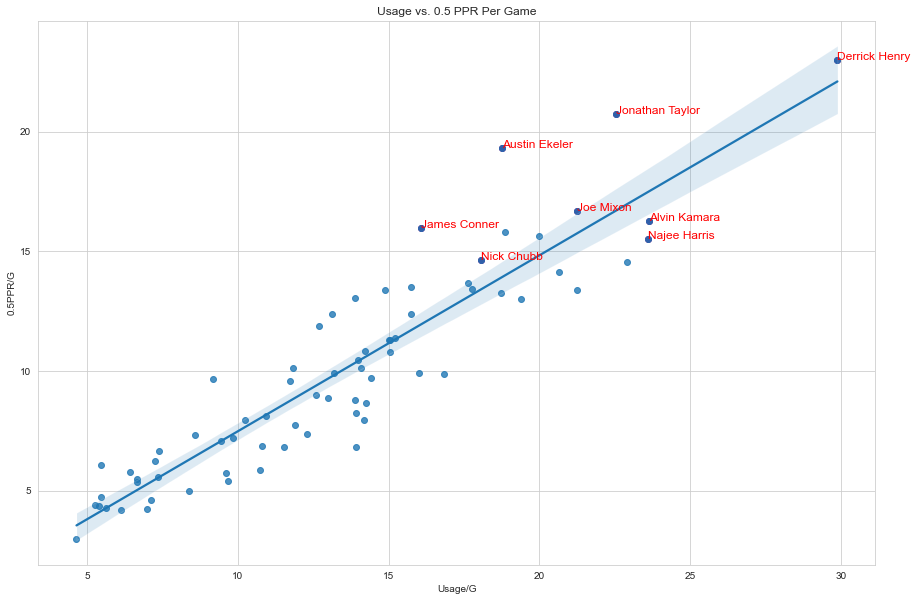

In [11]:
#Plot for Usage vs. 0.5 PPR/G
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

#Label biggest named runnings backs last year
notable_players = ['Jonathan Taylor','Austin Ekeler','James Conner', 'Alvin Kamara',
                   'Nick Chubb', 'Najee Harris', 'Joe Mixon','Derrick Henry']
for player_name in notable_players:
    player = rb_df.loc[rb_df['Player'] == player_name]
    
    #If df we get back is not empty, run the code below
    if not player.empty:
        #Grab Usage/G and 0.5 PPR/G
        usage = player['Usage/G']
        ppg = player['0.5PPR/G']
        
        ax.annotate(player_name, xy=(usage, ppg), color = 'red', fontsize=12)
        ax.scatter(usage, ppg, color = 'purple')
    
plot = sns.regplot(
        x=rb_df['Usage/G'],
        y=rb_df['0.5PPR/G'],
        scatter=True).set(title='Usage vs. 0.5 PPR Per Game')

In [12]:
#Calculate correlation score
corr_usage = rb_df[['Usage/G','0.5PPR/G']].dropna()
corr_usage.corr().round(2)

,Usage/G,0.5PPR/G
Usage/G,1.00,0.92
0.5PPR/G,0.92,1.00


In the scatterplot above, we can see a clear, strong, linear, positive correlation between Usage/G vs. 0.5 PPR Points/G. This would indicate that the more rushing attempts and receptions a running back gets, the more fantasy points he will score (obvious, I know).
Also, Usage/G and 0.5 PPR/G has a correlation score of 0.92 which further indicates that the 2 variables have a strong positive correlation.

In [19]:
#Sort values by highest usage per game
rb_df_usage = rb_df_usage.sort_values(by=['Usage/G'], ascending = False)
rb_df_usage.head(10)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Pass_Atts,Pass_Yds,Pass_TD,Int,Rush_Att,Rush_Yds,Y/A,Rush_TD,Tgt,Rec,Yds,Y/R,Receive_TD,Fmb,FL,TD,14:00:00,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,0.5PPR,0.5PPR/G,Usage/G,Eff_Score
43,44.0,Derrick Henry,TEN,RB,27.0,8.0,8.0,1.0,1.0,5.0,1.0,0.0,219.0,937.0,4.28,10.0,20.0,18.0,154.0,8.56,0.0,1.0,0.0,10.0,1.0,NaN,175.0,193.3,199.3,184.3,29.0,14.0,44.0,184.0,23.00,29.88,0.0962
31,32.0,Alvin Kamara,NOR,RB,26.0,13.0,10.0,0.0,0.0,0.0,0.0,0.0,240.0,898.0,3.74,4.0,67.0,47.0,439.0,9.34,5.0,0.0,0.0,9.0,NaN,NaN,188.0,234.7,240.7,211.2,42.0,9.0,32.0,211.5,16.27,23.62,0.0530
13,14.0,Najee Harris,PIT,RB,23.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,307.0,1200.0,3.91,7.0,94.0,74.0,467.0,6.31,3.0,0.0,0.0,10.0,NaN,NaN,227.0,300.7,306.7,263.7,81.0,4.0,14.0,264.0,15.53,23.59,0.0387
45,46.0,Dalvin Cook,MIN,RB,26.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,249.0,1159.0,4.65,6.0,49.0,34.0,224.0,6.59,0.0,3.0,2.0,6.0,1.0,NaN,172.0,206.3,214.3,189.3,26.0,15.0,46.0,189.0,14.54,22.92,0.0488
0,1.0,Jonathan Taylor,IND,RB,22.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,332.0,1811.0,5.45,18.0,51.0,40.0,360.0,9.00,2.0,4.0,2.0,20.0,NaN,NaN,333.0,373.1,381.1,353.1,187.0,1.0,1.0,353.0,20.76,22.53,0.0542
10,11.0,Joe Mixon,CIN,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,292.0,1205.0,4.13,13.0,48.0,42.0,314.0,7.48,3.0,2.0,1.0,16.0,NaN,NaN,246.0,287.9,294.9,266.9,100.0,3.0,11.0,267.0,16.69,21.25,0.0491
68,69.0,David Montgomery,CHI,RB,24.0,13.0,13.0,0.0,1.0,0.0,0.0,1.0,225.0,849.0,3.77,7.0,51.0,42.0,301.0,7.17,0.0,1.0,1.0,7.0,NaN,NaN,153.0,195.0,203.0,175.0,7.0,20.0,69.0,174.0,13.38,21.23,0.0485
75,76.0,Elijah Mitchell,SFO,RB,23.0,11.0,10.0,0.0,0.0,0.0,0.0,0.0,207.0,963.0,4.65,5.0,20.0,19.0,137.0,7.21,1.0,0.0,0.0,6.0,NaN,NaN,146.0,165.0,171.0,155.5,NaN,24.0,76.0,155.5,14.14,20.64,0.0623
139,140.0,Christian McCaffrey,CAR,RB,25.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,99.0,442.0,4.46,1.0,41.0,37.0,343.0,9.27,1.0,1.0,0.0,2.0,NaN,NaN,91.0,127.5,133.5,109.0,NaN,44.0,NaN,109.5,15.64,20.00,0.1117
32,33.0,Antonio Gibson,WAS,RB,23.0,16.0,14.0,0.0,0.0,0.0,0.0,0.0,258.0,1037.0,4.02,7.0,52.0,42.0,294.0,7.00,3.0,6.0,4.0,10.0,1.0,NaN,187.0,229.1,239.1,208.1,41.0,10.0,33.0,208.0,13.00,19.38,0.0419


The table above is sorted by most usage per game, where we can see Najee Harris is ranked 3rd for 2021. This is elite level usage, as his name is among the biggest fantasy running back studs in the league.

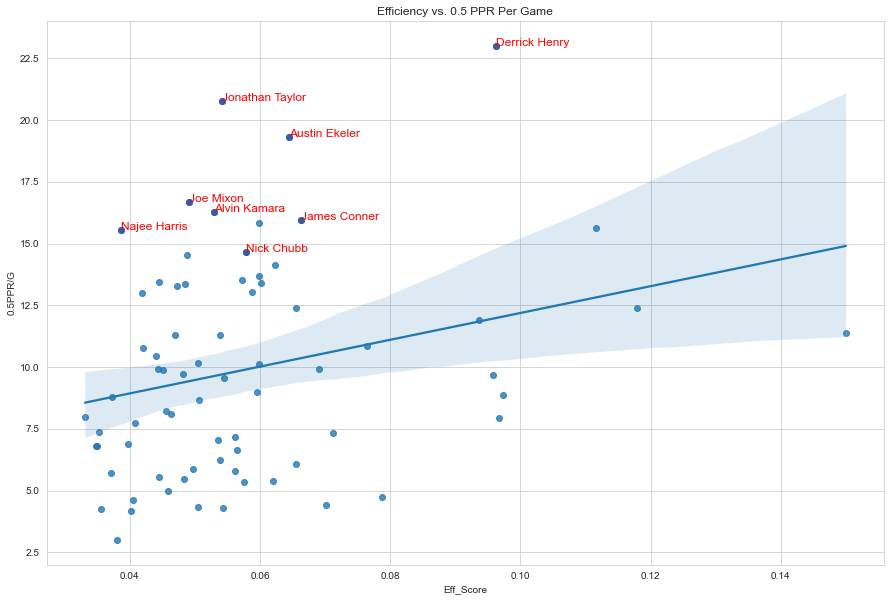

In [13]:
#Plot for Efficiency vs 0.5PPR/G
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

notable_players = ['Jonathan Taylor','Austin Ekeler','James Conner', 'Alvin Kamara',
                   'Nick Chubb', 'Najee Harris', 'Joe Mixon','Derrick Henry']

for player_name in notable_players:
    player = rb_df.loc[rb_df['Player'] == player_name]
    
    #If df we get back is not empty, run the code below
    if not player.empty:
        #Grab usage and 0.5 PPR/G
        usage = player['Eff_Score']
        ppg = player['0.5PPR/G']
        
        ax.annotate(player_name, xy=(usage, ppg), color = 'red', fontsize=12)
        ax.scatter(usage, ppg, color = 'purple')
    
plot = sns.regplot(
        x=rb_df['Eff_Score'],
        y=rb_df['0.5PPR/G'],
        scatter=True).set(title='Efficiency vs. 0.5 PPR Per Game')

In [14]:
#Calculate correlation score
corr_eff = rb_df[['Eff_Score','0.5PPR/G']].dropna()
corr_eff.corr().round(2)

,Eff_Score,0.5PPR/G
Eff_Score,1.00,0.27
0.5PPR/G,0.27,1.00


In the scatterplot above, we can see that the points for TD/Usage vs. 0.5PPR Points/G have no clear relationship. Therefore we can say that efficiency and fantasy production are not correlated.
Also, the correlation score between efficiency and fantasy points is 0.27 which shows that the relationship is not that strong.

In [17]:
#Sort values by lowest efficiency score for players who scored more than 10 points per game
rb_df_eff = rb_df[rb_df['0.5PPR/G'] > 10]
rb_df_eff = rb_df_eff.sort_values(by=['Eff_Score'], ascending = True)
rb_df_eff.head(10)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Pass_Atts,Pass_Yds,Pass_TD,Int,Rush_Att,Rush_Yds,Y/A,Rush_TD,Tgt,Rec,Yds,Y/R,Receive_TD,Fmb,FL,TD,14:00:00,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,0.5PPR,0.5PPR/G,Usage/G,Eff_Score
13,14.0,Najee Harris,PIT,RB,23.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,307.0,1200.0,3.91,7.0,94.0,74.0,467.0,6.31,3.0,0.0,0.0,10.0,NaN,NaN,227.0,300.7,306.7,263.7,81.0,4.0,14.0,264.0,15.53,23.59,0.0387
32,33.0,Antonio Gibson,WAS,RB,23.0,16.0,14.0,0.0,0.0,0.0,0.0,0.0,258.0,1037.0,4.02,7.0,52.0,42.0,294.0,7.00,3.0,6.0,4.0,10.0,1.0,NaN,187.0,229.1,239.1,208.1,41.0,10.0,33.0,208.0,13.00,19.38,0.0419
59,60.0,Javonte Williams,DEN,RB,21.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,203.0,903.0,4.45,4.0,53.0,43.0,316.0,7.35,3.0,2.0,1.0,7.0,NaN,NaN,162.0,204.9,211.9,183.4,16.0,18.0,60.0,183.5,10.79,15.06,0.0421
65,66.0,Devin Singletary,BUF,RB,24.0,17.0,16.0,0.0,0.0,0.0,0.0,0.0,188.0,870.0,4.63,7.0,50.0,40.0,228.0,5.70,1.0,5.0,0.0,8.0,NaN,NaN,158.0,197.8,203.8,177.8,12.0,19.0,66.0,178.0,10.47,14.00,0.0440
21,22.0,Ezekiel Elliott,DAL,RB,26.0,17.0,17.0,1.0,1.0,4.0,0.0,0.0,237.0,1002.0,4.23,10.0,65.0,47.0,287.0,6.11,2.0,1.0,1.0,12.0,3.0,NaN,205.0,252.1,259.1,228.6,59.0,6.0,22.0,228.5,13.44,17.76,0.0445
53,54.0,Melvin Gordon,DEN,RB,28.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,203.0,918.0,4.52,8.0,38.0,28.0,213.0,7.61,2.0,3.0,3.0,10.0,NaN,NaN,167.0,195.1,204.1,181.1,21.0,17.0,54.0,181.0,11.31,15.06,0.0469
46,47.0,Josh Jacobs,LVR,RB,23.0,15.0,14.0,0.0,0.0,0.0,0.0,0.0,217.0,872.0,4.02,9.0,64.0,54.0,348.0,6.44,0.0,2.0,2.0,9.0,NaN,NaN,172.0,226.0,234.0,199.0,26.0,16.0,47.0,199.0,13.27,18.73,0.0472
68,69.0,David Montgomery,CHI,RB,24.0,13.0,13.0,0.0,1.0,0.0,0.0,1.0,225.0,849.0,3.77,7.0,51.0,42.0,301.0,7.17,0.0,1.0,1.0,7.0,NaN,NaN,153.0,195.0,203.0,175.0,7.0,20.0,69.0,174.0,13.38,21.23,0.0485
45,46.0,Dalvin Cook,MIN,RB,26.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,249.0,1159.0,4.65,6.0,49.0,34.0,224.0,6.59,0.0,3.0,2.0,6.0,1.0,NaN,172.0,206.3,214.3,189.3,26.0,15.0,46.0,189.0,14.54,22.92,0.0488
10,11.0,Joe Mixon,CIN,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,292.0,1205.0,4.13,13.0,48.0,42.0,314.0,7.48,3.0,2.0,1.0,16.0,NaN,NaN,246.0,287.9,294.9,266.9,100.0,3.0,11.0,267.0,16.69,21.25,0.0491


The table above is sorted by efficiency score for runnings backs who scored more than 10 fantasy points per game, where we see Najee Harris is at the top of the list (least efficient).

## Conclusion

Through the above analysis, we can conclude that usage is a better metric than efficiency when measuring fantasy points scored by running backs. Even though Najee Harris was the least efficient running back amongst top scorers, he will continue to get a massive amount of usage which will lead to fantasy success in 2022.

Here are some facts that help predict why Najee's usage will continue to be sky-high in 2022:
1. No competition: Najee is the clear #1 on the Steeler's depth chart, and his closest competition is Benny Snell who carried the ball a whoping 36 times last year.
2. Better QB: during Big Ben's last year he struggled to throw the ball downfield, and the Steelers offense struggled because of it. Trubisky (or rookie Kenny Pickett) will be able to expand the field and improve the offense for the team next year, which will lead to more scoring drives and open boxes for Najee.
3. Bellcow situation: the Steelers and coach Mike Tomlin historically love to feature their stud running back as the bellcow for the team (think of Le'Veon Bell, James Conner, and Rashard Mendenhall). Najee had the 3rd highest usage per game in 2021, and 2022 will be no different. The Steelers will continue to feed him, as they do with all their feature running backs every year.